## * **🔗 Check out the [Streamlit app](https://bank-loan-defaulter-prediction-arun.streamlit.app/) for this project!**
## * **💻 Explore the complete code on [GitHub](https://github.com/arunkumarsp-ds/Bank-Loan-Defaulter-Prediction/tree/main)!**

## **Introduction:**

This project focuses on **predicting loan defaulters** using a dataset provided by **MachineHack for the Deloitte Hackathon**. With the increasing number of bad loans impacting banks' profitability and the country's economy, accurate prediction of loan defaults has become crucial.

## **Goal:**

The objective is to develop a **machine learning model** that can **predict** whether a customer will **default on their loan** based on various financial and demographic attributes, such as loan amount and interest rate.

## **Dataset's Attributes:**

1. **ID:** unique ID of representative.
2. **Loan Amount:** loan amount applied.
3. **Funded Amount:** loan amount funded. 
4. **Funded Amount Investor:** loan amount approved by the investors. 
5. **Term:** term of loan (in months). 
6. **Batch Enrolled:** batch numbers to representatives. 
7. **Interest Rate:** interest rate (%) on loan.
8. **Grade:** grade by the bank. 
9. **Sub Grade:** sub-grade by the bank. 
10.~~**Employment Duration:** duration.~~ **income:** income of the person
11. **Home Ownership:** Owner ship of home. 
12. **Verification Status:** Income verification by the bank. 
13. **Payment Plan:** if any payment plan has started against loan.
14. **Loan Title:** loan title provided. 
15. **Debit to Income:** ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage.
16. **Delinquency - two years:** number of 30+ days delinquency in past 2 years. 
17. **Inquires- six months:** total number of inquiries in last 6 months. 
18. **Open Account:** number of open credit line in representative's credit line. 
19. **Public Record:** number of derogatory public records.
20. **Revolving Balance:** total credit revolving balance. 
21. **Revolving Utilities:** amount of credit a representative is using relative to revolving_balance.
22. **Total Accounts:** total number of credit lines available in representatives credit line. 
23. **Initial List Status:** unique listing status of the loan - W(Waiting), F(Forwarded).
24. **Total Received Interest:** total interest received till date.
25. **Total Received Late Fee:** total late fee received till date. 
26. **Recoveries:** post charge off gross recovery. 
27. **Collection Recovery Fee:** post charge off collection fee. 
28. **Collection 12 months Medical:** total collections in last 12 months excluding medical collections.
29. **Application Type:** indicates when the representative is an individual or joint. 
30. **Last week Pay:** indicates how long (in weeks) a representative has paid EMI after batch enrolled. 
31. **Accounts Delinquent:** number of accounts on which the representative is delinquent. 
32. **Total Collection Amount:** total collection amount ever owed. 
33. **Total Current Balance:** total current balance from all accounts. 
34. **Total Revolving Credit Limit:** total revolving credit limit. 
35. **Loan Status:** 1 = Defaulter, 0 = Non Defaulters.


##  **(A) Import required libraries and read the dataset:**

### **1) Importing the basic libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# will be importing other libraries on the go as we need 

### **2) Initial Data Exploration: Viewing Samples, Shape, and Feature Overview**

In [2]:
loan_df = pd.read_csv(r"Bank loan data.csv")

In [3]:
# to see all the columns:
pd.set_option("display.max_columns",None)

In [4]:
loan_df.shape

(67463, 35)

In [5]:
loan_df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

* we have **67463 rows and 35 columns** which consists of both **numerical as well as object type** .Thankfully we **dont have null values**

## **(B) Data cleansing and Exploratory data analysis:**

### **3) Checking for Duplicate Records and Handling Missing Values** 

In [7]:
sum(loan_df.duplicated())

0

**we dont have any duplicates and missing values as we checked earlier in info itself.**

### **4) Summary Statistics of the Dataset and Key Observations**

In [8]:
#for my easines i am converting the column names into snake case:

loan_df.columns = loan_df.columns.str.lower().str.replace(" ","_")

In [9]:
loan_df["employment_duration"].unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [10]:
loan_df["home_ownership"].unique()

array([176346.6267 ,  39833.921  ,  91506.69105, ...,  34813.96985,
        96938.83564, 105123.1558 ])

**There is a mistake in the column names where the home ownership should be inplace of the employment duration and income inplace of home ownership**

In [11]:
loan_df.columns

Index(['id', 'loan_amount', 'funded_amount', 'funded_amount_investor', 'term',
       'batch_enrolled', 'interest_rate', 'grade', 'sub_grade',
       'employment_duration', 'home_ownership', 'verification_status',
       'payment_plan', 'loan_title', 'debit_to_income',
       'delinquency_-_two_years', 'inquires_-_six_months', 'open_account',
       'public_record', 'revolving_balance', 'revolving_utilities',
       'total_accounts', 'initial_list_status', 'total_received_interest',
       'total_received_late_fee', 'recoveries', 'collection_recovery_fee',
       'collection_12_months_medical', 'application_type', 'last_week_pay',
       'accounts_delinquent', 'total_collection_amount',
       'total_current_balance', 'total_revolving_credit_limit', 'loan_status'],
      dtype='object')

In [12]:
loan_df.rename(columns={"home_ownership": "income","employment_duration": "home_ownership"}, inplace=True)

In [13]:
loan_df.sample(3)

,id,loan_amount,funded_amount,funded_amount_investor,term,batch_enrolled,interest_rate,grade,sub_grade,home_ownership,income,verification_status,payment_plan,loan_title,debit_to_income,delinquency_-_two_years,inquires_-_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,initial_list_status,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
53269,43396481,16789,7415,16134.288170,59,BAT1586599,16.591231,B,B4,MORTGAGE,67031.16689,Verified,n,Credit card refinancing,28.343538,0,0,13,0,3853,9.533126,21,w,502.628009,33.757913,9.553851,0.809870,0,INDIVIDUAL,102,0,22,50247,18172,0
52209,60175967,7903,3581,10482.795460,59,BAT1104812,10.290429,F,D1,MORTGAGE,51080.13747,Source Verified,n,Credit card refinancing,25.219894,0,2,16,0,7182,54.055471,12,f,8630.094269,0.051463,5.648516,0.388504,0,INDIVIDUAL,155,0,39,28963,9983,0
33537,7972647,7680,6879,5890.542375,58,BAT5629144,16.905163,C,A5,MORTGAGE,76492.86642,Source Verified,n,Credit card refinancing,17.670655,1,0,9,0,22636,24.264553,9,w,2116.931906,0.082234,3.179945,0.854933,0,INDIVIDUAL,136,0,44,295364,14843,0


In [14]:
# statistical summary for numeric variables:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,67463.0,2.562761e+07,2.109155e+07,1.297933e+06,6.570288e+06,1.791565e+07,4.271521e+07,7.224578e+07
loan_amount,67463.0,1.684890e+04,8.367866e+03,1.014000e+03,1.001200e+04,1.607300e+04,2.210600e+04,3.500000e+04
funded_amount,67463.0,1.577060e+04,8.150993e+03,1.014000e+03,9.266500e+03,1.304200e+04,2.179300e+04,3.499900e+04
funded_amount_investor,67463.0,1.462180e+04,6.785345e+03,1.114590e+03,9.831685e+03,1.279368e+04,1.780759e+04,3.499975e+04
term,67463.0,5.817381e+01,3.327441e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,5.900000e+01
interest_rate,67463.0,1.184626e+01,3.718629e+00,5.320006e+00,9.297147e+00,1.137770e+01,1.419353e+01,2.718235e+01
income,67463.0,8.054150e+04,4.502912e+04,1.457354e+04,5.168984e+04,6.933583e+04,9.462332e+04,4.065615e+05
debit_to_income,67463.0,2.329924e+01,8.451824e+00,6.752991e-01,1.675642e+01,2.265666e+01,3.004840e+01,3.962986e+01
delinquency_-_two_years,67463.0,3.271275e-01,8.008884e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
inquires_-_six_months,67463.0,1.457540e-01,4.732913e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


### **Statistical summary Insights(numerical data):**

#### **i dont know the currency so i am going with usd**

* Maximum loan amount is **USD 35,000**, minimum loan amount is **USD 1,014**, and the average loan amount is **USD 16,848**.
* Maximum funded amount is **USD 34,999**, minimum funded amount is **USD 1,014**, and the average funded amount is **USD 15,770**.
* Average loan term is **58 months**.
* Average interest rate is **11.84%**.
* Average total collection amount is **USD 146**.
* Average total received interest is **USD 2,068**.

In [15]:
# statistical summary of the categorical variables: 
loan_df.describe(include ="O")

,batch_enrolled,grade,sub_grade,home_ownership,verification_status,payment_plan,loan_title,initial_list_status,application_type
count,67463,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340


### **Statistical summary Insights(categorical data):**

#### **Most frequent categories:**

* Grade assigned by the bank:** C**.
* Home ownership status: **Mortgage**.
* Application type: **Individual**.
* Loan title: **Credit card refinancing**.
* Verification status: **Almost half** of the applications are **source verified**.

### **5) Dropping Redundant Columns for Analysis**

In [16]:
loan_df.head()

,id,loan_amount,funded_amount,funded_amount_investor,term,batch_enrolled,interest_rate,grade,sub_grade,home_ownership,income,verification_status,payment_plan,loan_title,debit_to_income,delinquency_-_two_years,inquires_-_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,initial_list_status,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


#### **correlation matrix**:

<Axes: >

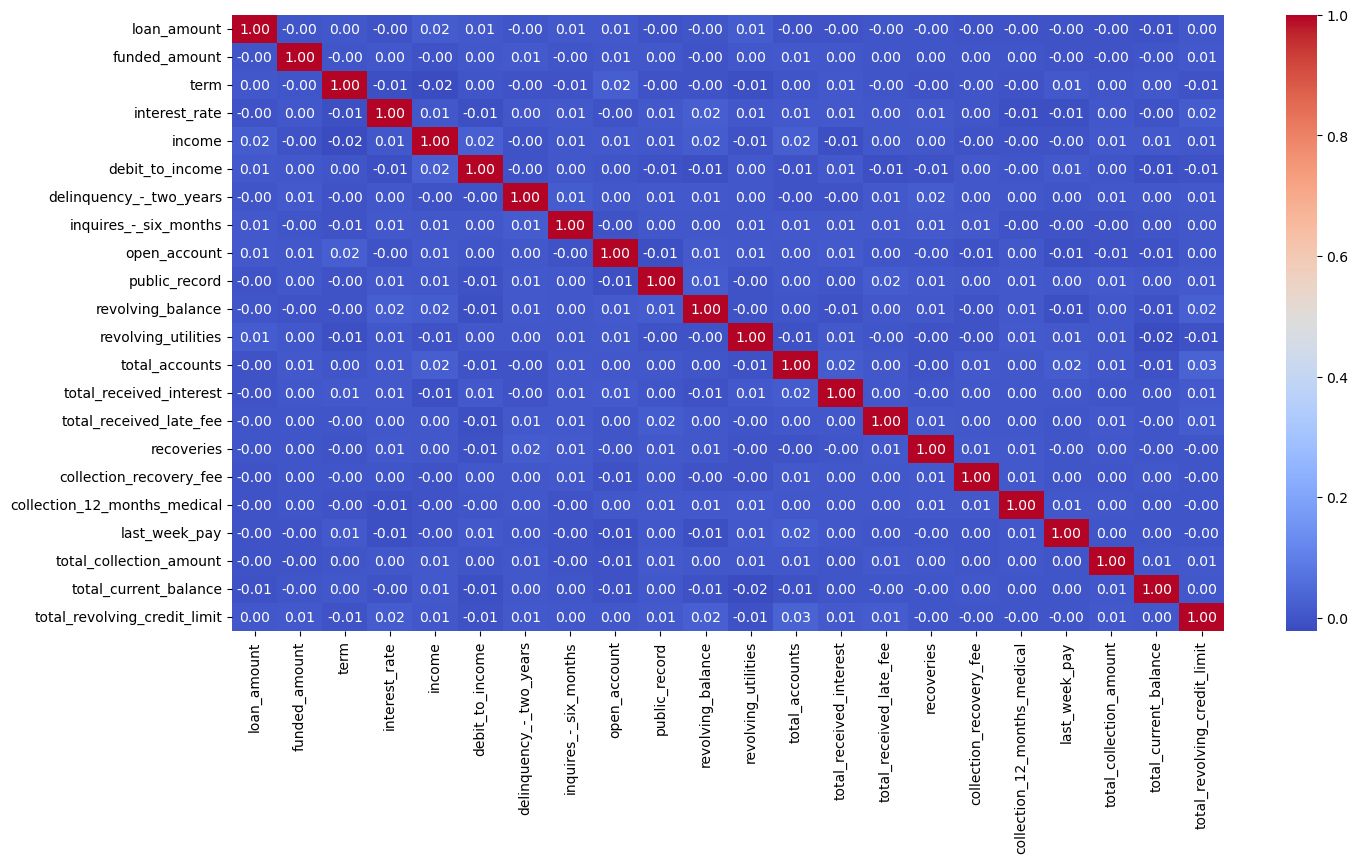

In [17]:
numerical_features = ['loan_amount', 'funded_amount','term',
                       'interest_rate', "income",  'debit_to_income',
                       'delinquency_-_two_years', 'inquires_-_six_months', 'open_account',
                       'public_record', 'revolving_balance', 'revolving_utilities',
                       'total_accounts',  'total_received_interest',
                       'total_received_late_fee', 'recoveries', 'collection_recovery_fee',
                       'collection_12_months_medical',  'last_week_pay','total_collection_amount',
                       'total_current_balance', 'total_revolving_credit_limit']
corr = loan_df[numerical_features].corr()
plt.figure(figsize =(16,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

**since we dont have any strong correlation within the features which is more than 80% , we will check whether any features have only one unique value as it is not needed**

In [18]:
loan_df.nunique()

id                              67463
loan_amount                     27525
funded_amount                   24548
funded_amount_investor          67441
term                                3
batch_enrolled                     41
interest_rate                   67448
grade                               7
sub_grade                          35
home_ownership                      3
income                          67454
verification_status                 3
payment_plan                        1
loan_title                        109
debit_to_income                 67454
delinquency_-_two_years             9
inquires_-_six_months               6
open_account                       36
public_record                       5
revolving_balance               20582
revolving_utilities             67458
total_accounts                     69
initial_list_status                 2
total_received_interest         67451
total_received_late_fee         67380
recoveries                      67387
collection_r

**we will drop these features: accounts_delinquent and payment_plan as it have only one unique value.**

#### **checking whether we can remove subgrade or not**

In [19]:
loan_df["grade"].unique()

array(['B', 'C', 'F', 'A', 'G', 'E', 'D'], dtype=object)

In [20]:
loan_df["sub_grade"].unique()

array(['C4', 'D3', 'D4', 'C3', 'G5', 'C5', 'A5', 'C2', 'B5', 'B1', 'B4',
       'A4', 'B2', 'D2', 'C1', 'F3', 'D1', 'F2', 'A2', 'A3', 'F1', 'E5',
       'B3', 'F4', 'G1', 'F5', 'E1', 'E2', 'D5', 'G2', 'E4', 'A1', 'G3',
       'E3', 'G4'], dtype=object)

In [21]:
loan_df[loan_df["grade"]=="A"].sample(5)

,id,loan_amount,funded_amount,funded_amount_investor,term,batch_enrolled,interest_rate,grade,sub_grade,home_ownership,income,verification_status,payment_plan,loan_title,debit_to_income,delinquency_-_two_years,inquires_-_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,initial_list_status,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
32612,3699589,14676,7588,15814.84442,59,BAT5811547,14.941319,A,B2,MORTGAGE,39750.49208,Verified,n,Debt consolidation,34.165556,1,0,13,0,6220,47.286173,22,f,1103.180132,0.005184,7.732204,0.804762,0,INDIVIDUAL,78,0,548,198447,52700,0
27999,61188148,21084,23132,15045.68725,59,BAT2252229,17.341195,A,A3,RENT,61085.99899,Source Verified,n,debt consolidation,18.238541,0,0,37,0,26660,18.312506,16,f,1786.317927,0.029601,2.482634,0.937989,0,INDIVIDUAL,135,0,41,196166,58829,0
8676,40097563,4035,22811,16246.90233,59,BAT3873588,17.059463,A,A5,MORTGAGE,113935.16350,Source Verified,n,Payoff,23.564995,0,1,10,0,7627,67.215311,17,w,3281.111046,0.074620,6.569218,0.182233,0,INDIVIDUAL,91,0,28,241946,35792,0
28263,8121083,24171,15029,10449.48196,59,BAT3193689,14.034214,A,C1,RENT,71564.56932,Source Verified,n,Debt consolidation,11.912051,1,0,28,0,6904,66.885102,15,f,9785.498771,0.046171,3.403394,1.617392,0,INDIVIDUAL,51,0,48,127177,61985,0
3994,63848590,29146,21627,24800.39215,59,BAT2333412,11.893389,A,D2,RENT,120037.26490,Source Verified,n,Credit card refinancing,10.503910,0,0,22,1,28,84.791191,6,f,2760.869726,0.042157,0.540150,1.280058,0,INDIVIDUAL,158,0,62,53625,30569,0


**sub grades are inconsistent like it should be between A1 to A5 considering the grade is A but it have D3 ,B4 so i am remvoing subgrade**

**also  removing these columns "ID" ,"Batch Enrolled" as it is only for administration purposes**

In [22]:
loan_df.drop(columns=["funded_amount_investor","sub_grade","id","batch_enrolled",
                      "payment_plan","accounts_delinquent"] ,inplace =True)

In [23]:
loan_df.columns

Index(['loan_amount', 'funded_amount', 'term', 'interest_rate', 'grade',
       'home_ownership', 'income', 'verification_status', 'loan_title',
       'debit_to_income', 'delinquency_-_two_years', 'inquires_-_six_months',
       'open_account', 'public_record', 'revolving_balance',
       'revolving_utilities', 'total_accounts', 'initial_list_status',
       'total_received_interest', 'total_received_late_fee', 'recoveries',
       'collection_recovery_fee', 'collection_12_months_medical',
       'application_type', 'last_week_pay', 'total_collection_amount',
       'total_current_balance', 'total_revolving_credit_limit', 'loan_status'],
      dtype='object')

In [24]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   loan_amount                   67463 non-null  int64  
 1   funded_amount                 67463 non-null  int64  
 2   term                          67463 non-null  int64  
 3   interest_rate                 67463 non-null  float64
 4   grade                         67463 non-null  object 
 5   home_ownership                67463 non-null  object 
 6   income                        67463 non-null  float64
 7   verification_status           67463 non-null  object 
 8   loan_title                    67463 non-null  object 
 9   debit_to_income               67463 non-null  float64
 10  delinquency_-_two_years       67463 non-null  int64  
 11  inquires_-_six_months         67463 non-null  int64  
 12  open_account                  67463 non-null  int64  
 13  p

### **6) Conducting Univariate and Multivariate Analysis**

### **univariate analysis:**

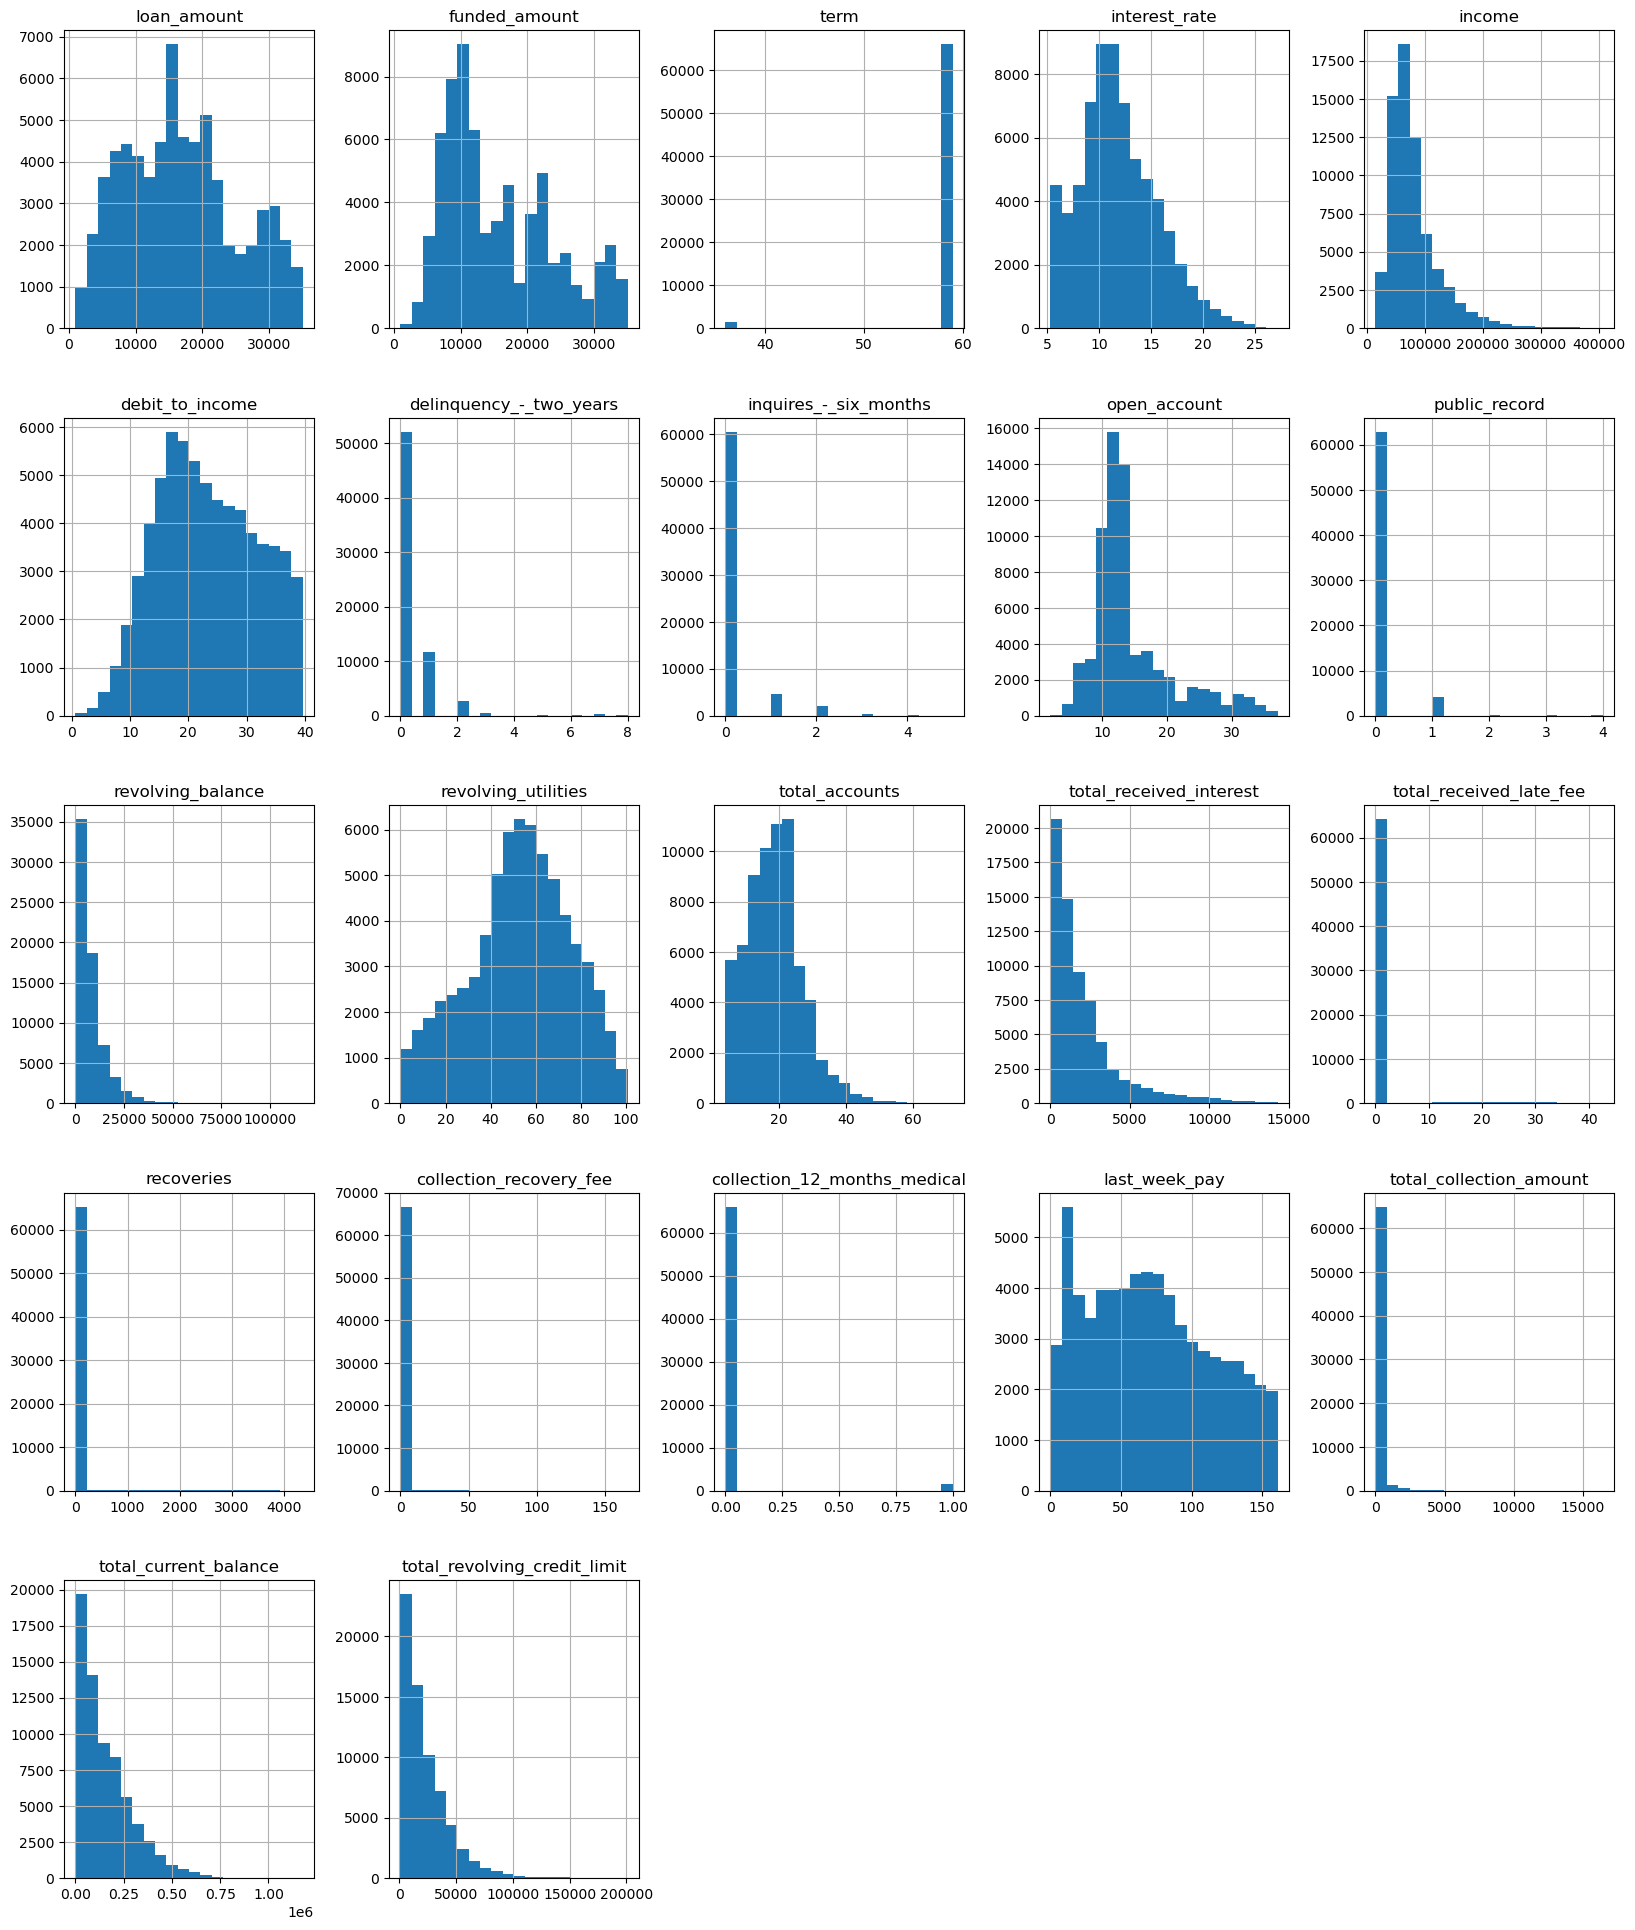

In [25]:
# Histograms for numerical features

loan_df[numerical_features].hist(figsize=(20,24), bins=20)
plt.show()

### **Insights From Univariate Analysis (numerical continous data):**

#### **Key insights from the data distribution:**

* Loan amounts are most frequently between **USD 10,000 and 20,000**, with a spike around **USD 15,000**.
* Funded amounts tend to be around **USD 10,000**.
* Interest rates are typically between **10% and 12%**.
* Incomes are generally less than USD **100,000**.
* Debt-to-income ratios hover around **20%.**
* Open accounts are usually between **10 and 15.**
* Revolving balances are below USD **25,000.**
* Revolving utilities fall between **25% and 75%.**
* Total accounts are usually **around 20.**
* Total received interest is typically less than **USD 5,000.**

### **Distribution of discrete numerical features in percentage:**

In [26]:
discrete_numerical_features = ['term','delinquency_-_two_years', 'inquires_-_six_months',
                      'public_record','collection_12_months_medical']

In [27]:
for feature in discrete_numerical_features:
    print(loan_df[feature].value_counts(normalize=True))
    print()

59    0.648948
58    0.329455
36    0.021597
Name: term, dtype: float64

0    0.771593
1    0.173962
2    0.039296
3    0.006596
7    0.003735
6    0.002831
5    0.001097
8    0.000652
4    0.000237
Name: delinquency_-_two_years, dtype: float64

0    0.896580
1    0.067563
2    0.030268
3    0.004743
4    0.000800
5    0.000044
Name: inquires_-_six_months, dtype: float64

0    0.931933
1    0.061263
2    0.002965
4    0.002727
3    0.001112
Name: public_record, dtype: float64

0    0.978699
1    0.021301
Name: collection_12_months_medical, dtype: float64



### **Insights From Univariate Analyis (numerical discrete data):**

* **93%** of applicants have **0 public records**.
* **97%** of applicants have a total collection amount (**including medical**).
* **89%** of applicants have **0 inquiries** in the last six months.
* **77%** of applicants have **0 delinquencies** in the past two years.
* **97%** of applicants have a loan term of either **58 or 59 months**.

### **Distribution of categorical features :**

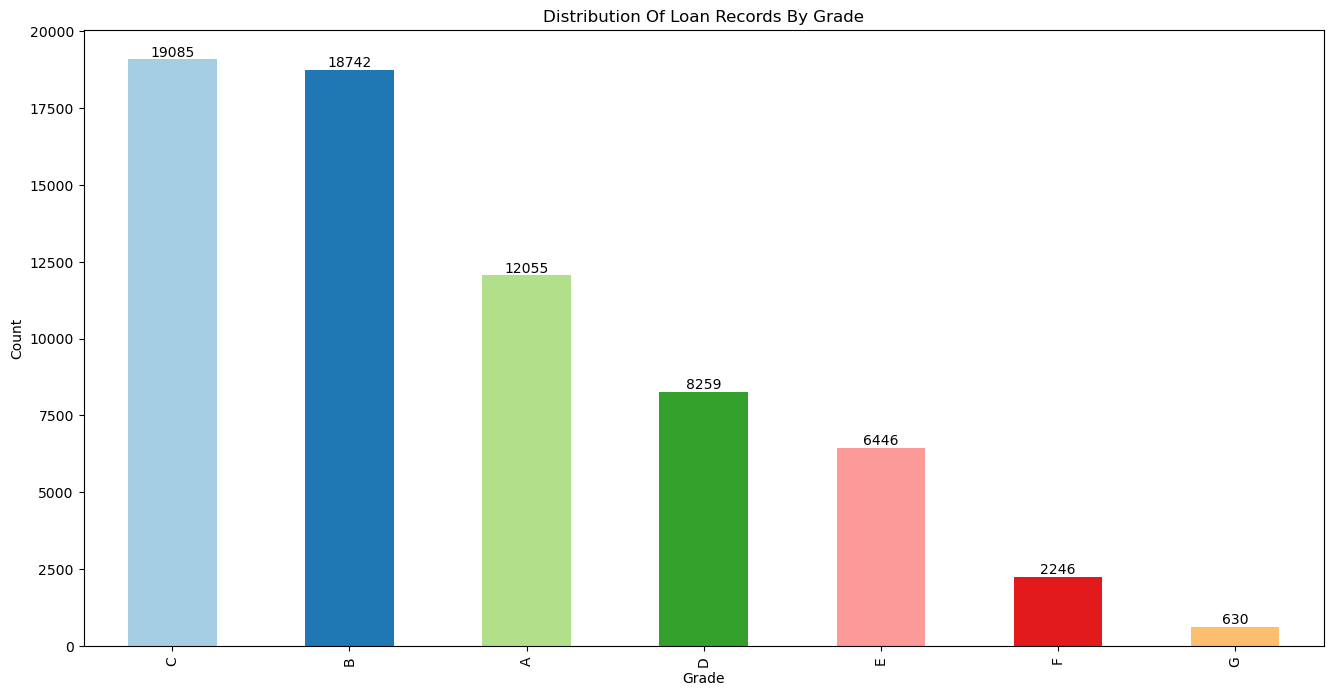

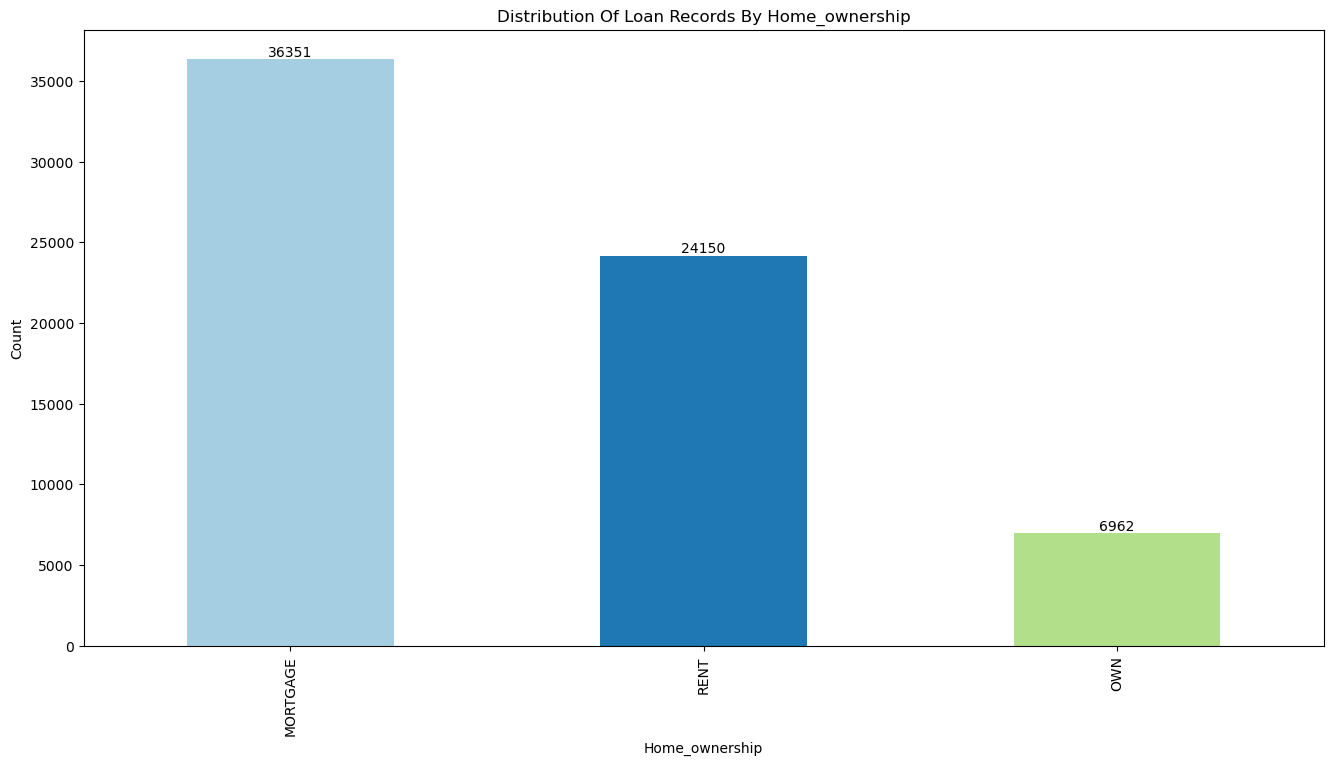

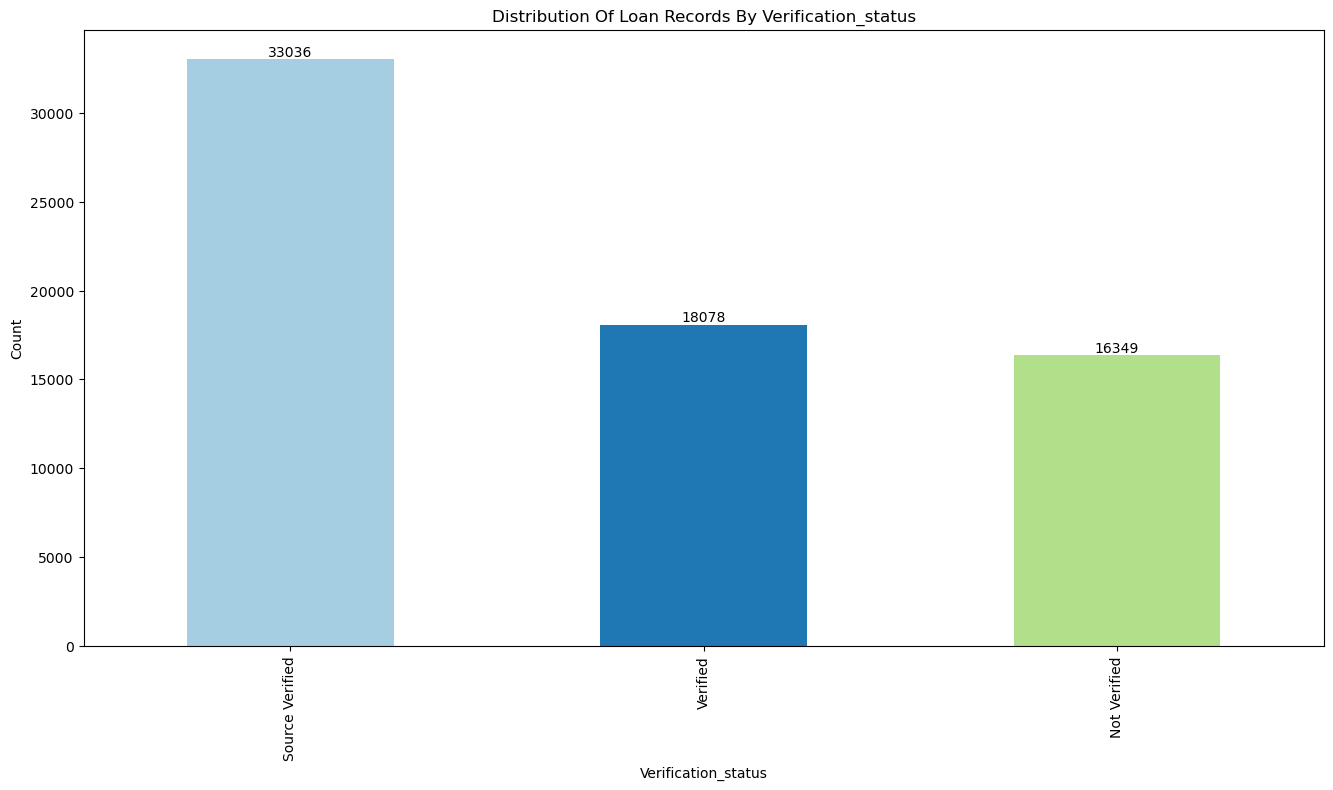

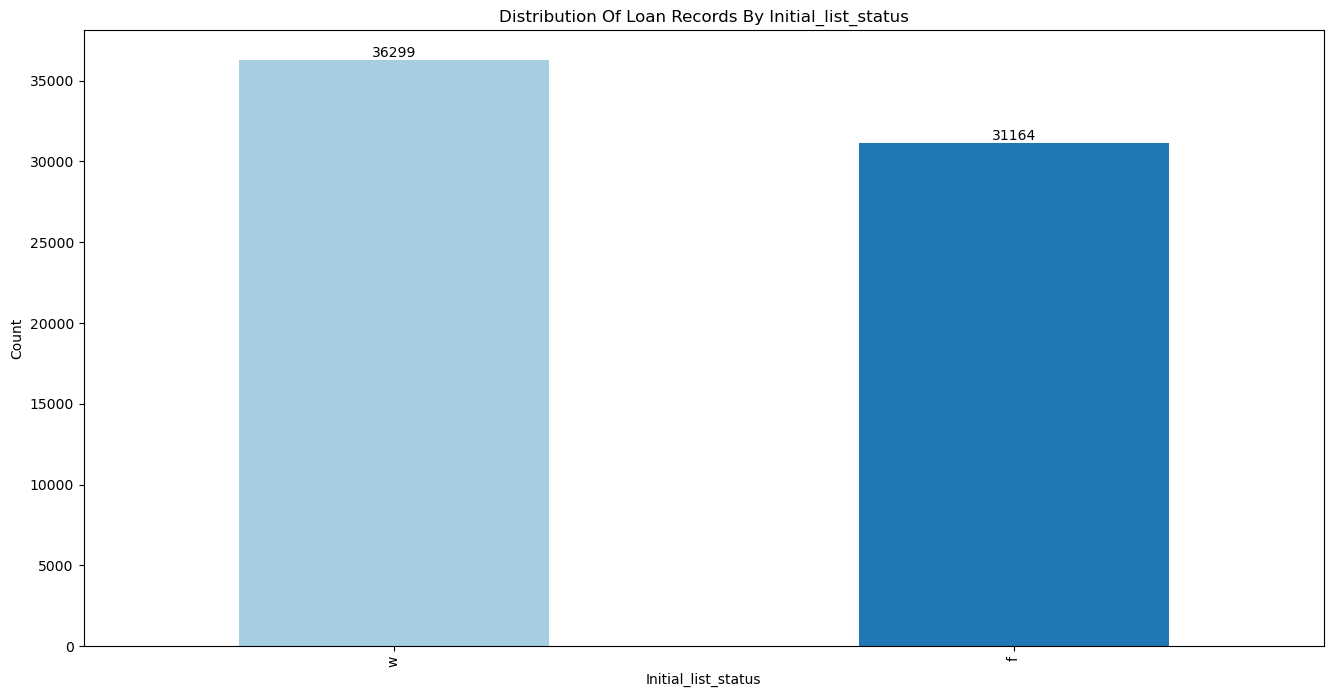

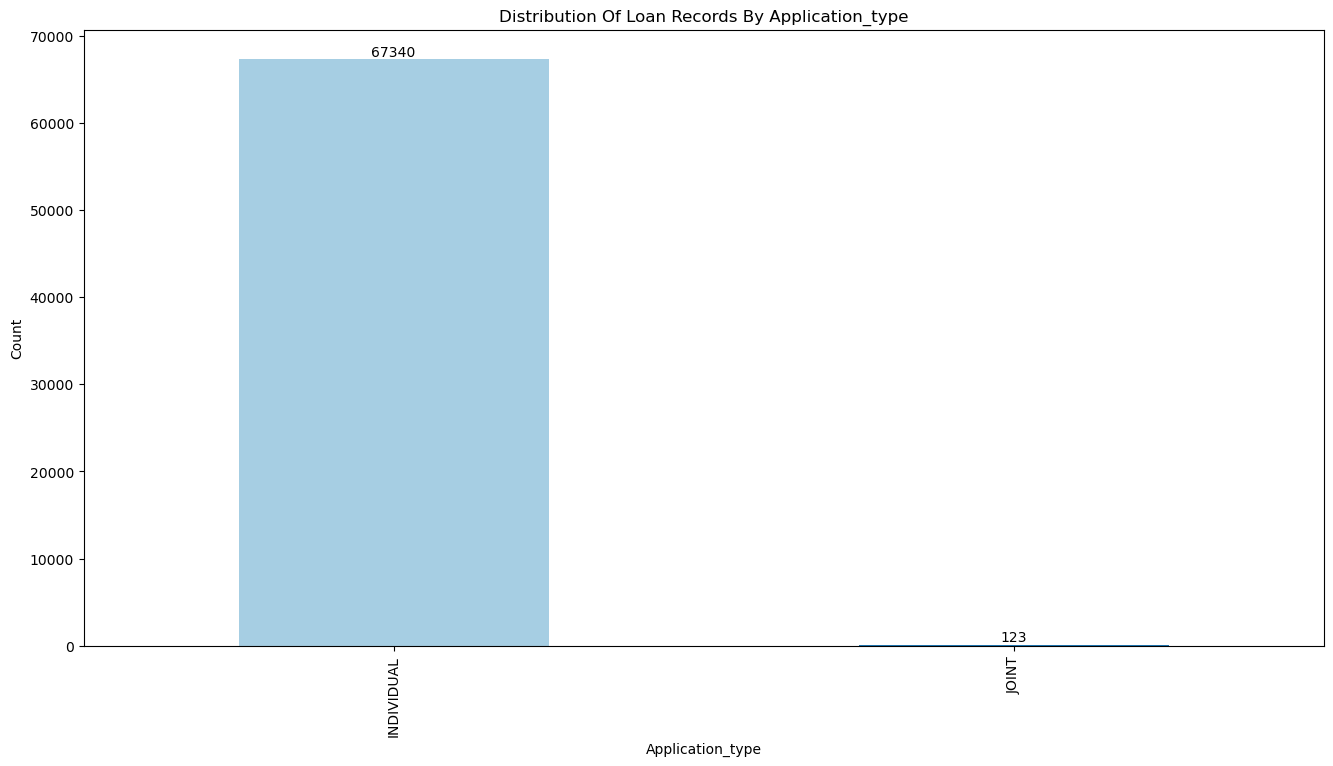

In [28]:
categorical_features = ["grade",'home_ownership',"verification_status", 
                        "initial_list_status","application_type"]


palette = sns.color_palette("Paired")

for feature in categorical_features:
    plt.figure(figsize=(16,8))
    colors = palette[:loan_df[feature].nunique()]
    loan_df[feature].value_counts().plot(kind="bar",color =colors)
    plt.title(f"Distribution Of Loan Records By {str.capitalize(feature)}")
    for i, value in enumerate(loan_df[feature].value_counts()):
        plt.text(i, value + 5, str(value), ha ='center', va ="bottom")
    plt.xlabel(f"{str.capitalize(feature)}")
    plt.ylabel("Count")
    plt.show()

### **Distribution of categorical features in percentage:**

In [29]:
for feature in categorical_features:
    print(loan_df[feature].value_counts(normalize=True))

C    0.282896
B    0.277812
A    0.178691
D    0.122423
E    0.095549
F    0.033292
G    0.009338
Name: grade, dtype: float64
MORTGAGE    0.538829
RENT        0.357974
OWN         0.103197
Name: home_ownership, dtype: float64
Source Verified    0.489691
Verified           0.267969
Not Verified       0.242340
Name: verification_status, dtype: float64
w    0.538058
f    0.461942
Name: initial_list_status, dtype: float64
INDIVIDUAL    0.998177
JOINT         0.001823
Name: application_type, dtype: float64


### **Insights From Univariate analysis Categorical Data:**

#### **Top categories and distributions:**

* The **top 3 grades, C, B, and A**, account for more than **70% of all loans**.
* **88% of applicants** have a home in either rental or mortgage form, leaving less than 12% with their own home.
* More than **75% of applicants** are either verified or source verified, with the remaining 25% being not verified.
* **Almost all** applicants are of **individual** loan application type. **Less than 0.5% have a joint application type.**
* Approximately **46%** of the loans have an initial listing status of **waitlisted**, while the remaining **53% are forwarded.**

In [30]:
top_10_loans = loan_df["loan_title"].value_counts().head(10)
top_10_loans

Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
Major purchase               487
Medical expenses             237
Business                     183
Moving and relocation        157
Car financing                135
Name: loan_title, dtype: int64

In [31]:
top_10_loans_df = loan_df[loan_df["loan_title"].isin(top_10_loans.index)]

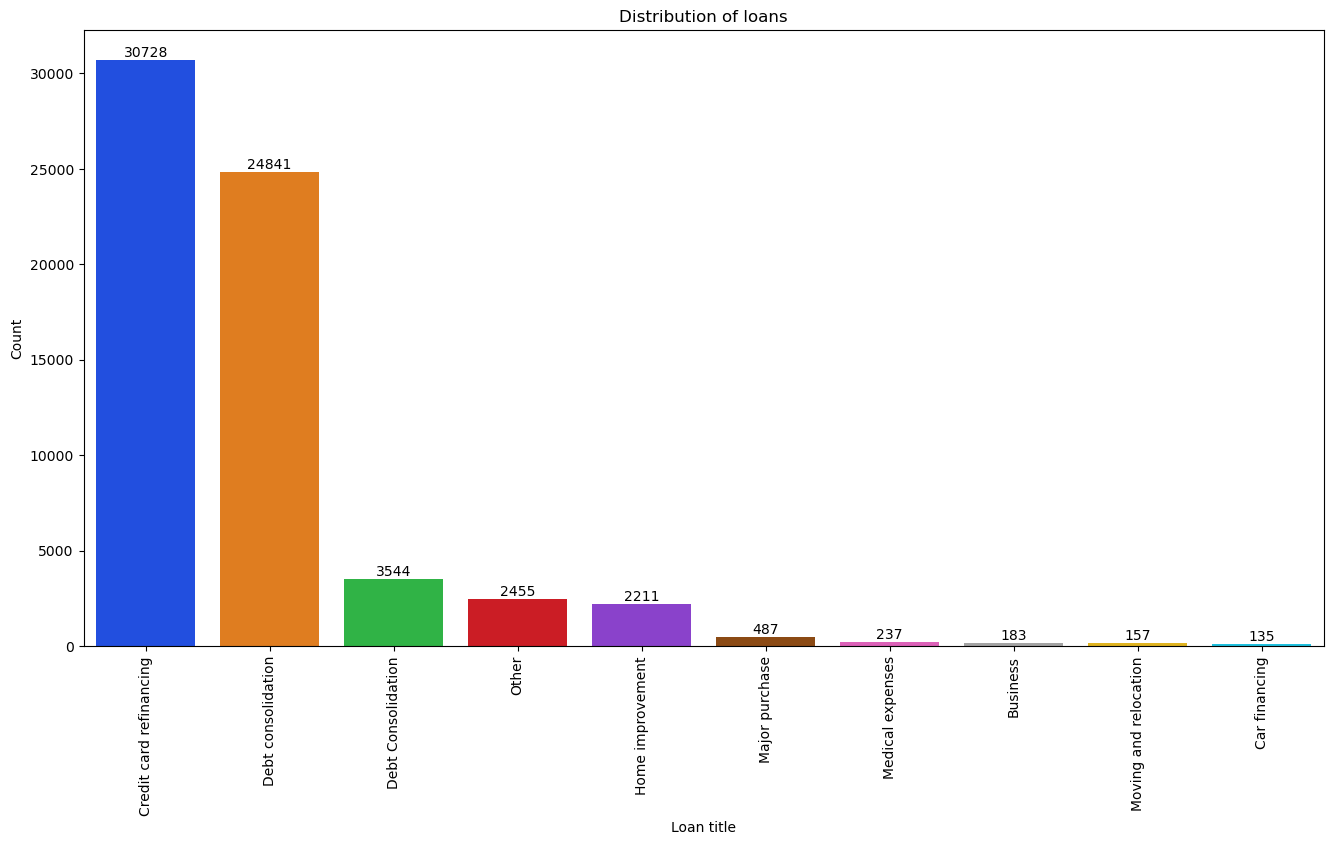

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(x= "loan_title", data= top_10_loans_df ,order= top_10_loans.index, palette= "bright",)
plt.title("Distribution of loans")
plt.xlabel('Loan title')
plt.ylabel('Count')
for i ,value in enumerate(top_10_loans):
    plt.text(i,value +5 ,s = str(value),ha ="center" ,va ="bottom")
plt.xticks(rotation=90)
plt.show()

### **Distribution of loans in percentage:**

In [33]:
loan_df["loan_title"].value_counts(normalize=True).head(10)

Credit card refinancing    0.455479
Debt consolidation         0.368217
Debt Consolidation         0.052532
Other                      0.036390
Home improvement           0.032774
Major purchase             0.007219
Medical expenses           0.003513
Business                   0.002713
Moving and relocation      0.002327
Car financing              0.002001
Name: loan_title, dtype: float64

In [34]:
loan_df["loan_title"].value_counts(normalize=True).head(10).sum()

0.9631649941449388

#### **The top 10 loan types** contribute to more than **96%** of loans. Out of these, **credit card refinancing and debt consolidation** alone make up more than **86%**.

### **Multivariate analysis:**

#### **loading only few important features as it is taking more time now**

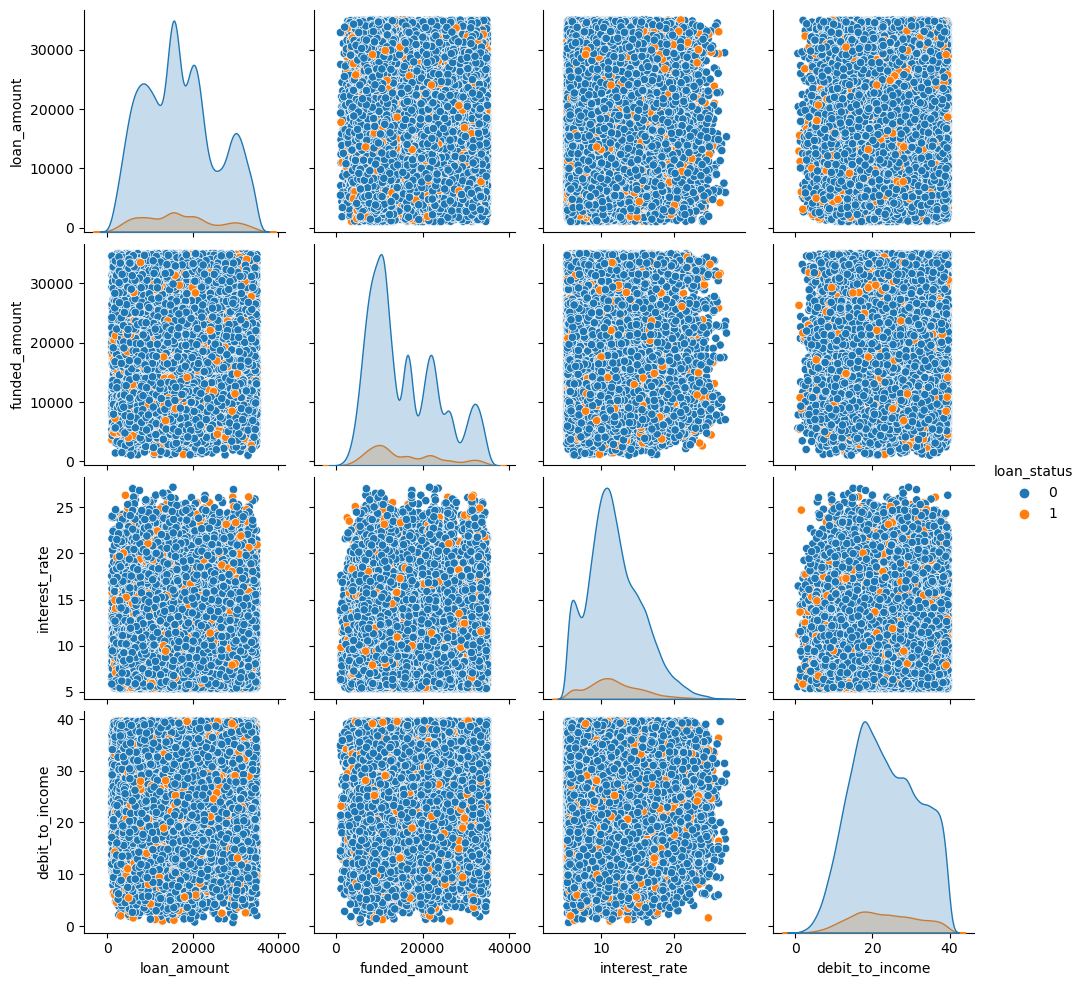

In [35]:
# Pairplot for a subset of features
subset_features = ['loan_amount', 'funded_amount', 'interest_rate', 'debit_to_income','loan_status'] 
sns.pairplot(data = loan_df[subset_features], hue='loan_status')
plt.show()

**From the multivariate analysis of the pairplot with hue, we can see that the applicants are clustered together, and there are no clear, distinguishable patterns between loan defaulters and non-defaulters.**

### **7) Analyzing the Distribution of the Target Column 'Loan Status'**

<Axes: xlabel='loan_status', ylabel='count'>

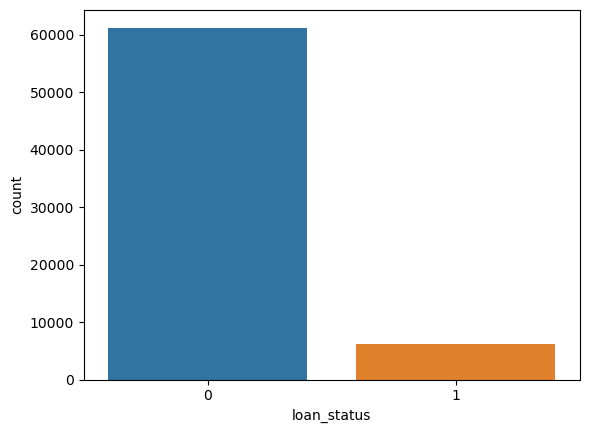

In [36]:
sns.countplot(data = loan_df ,x= "loan_status")

In [37]:
loan_df["loan_status"].value_counts()

0    61222
1     6241
Name: loan_status, dtype: int64

In [38]:
loan_df["loan_status"].value_counts(normalize=True)

0    0.90749
1    0.09251
Name: loan_status, dtype: float64

**From the above we can see that the target class is very imbalanced as the non defaulter accounts for more than 90 %. so the model predicts non defaulter better than defaulter, so we need to use sampling techniques to make it balanced**

## **(C) Data preparation for model building :**

### **8) outlier handling:**

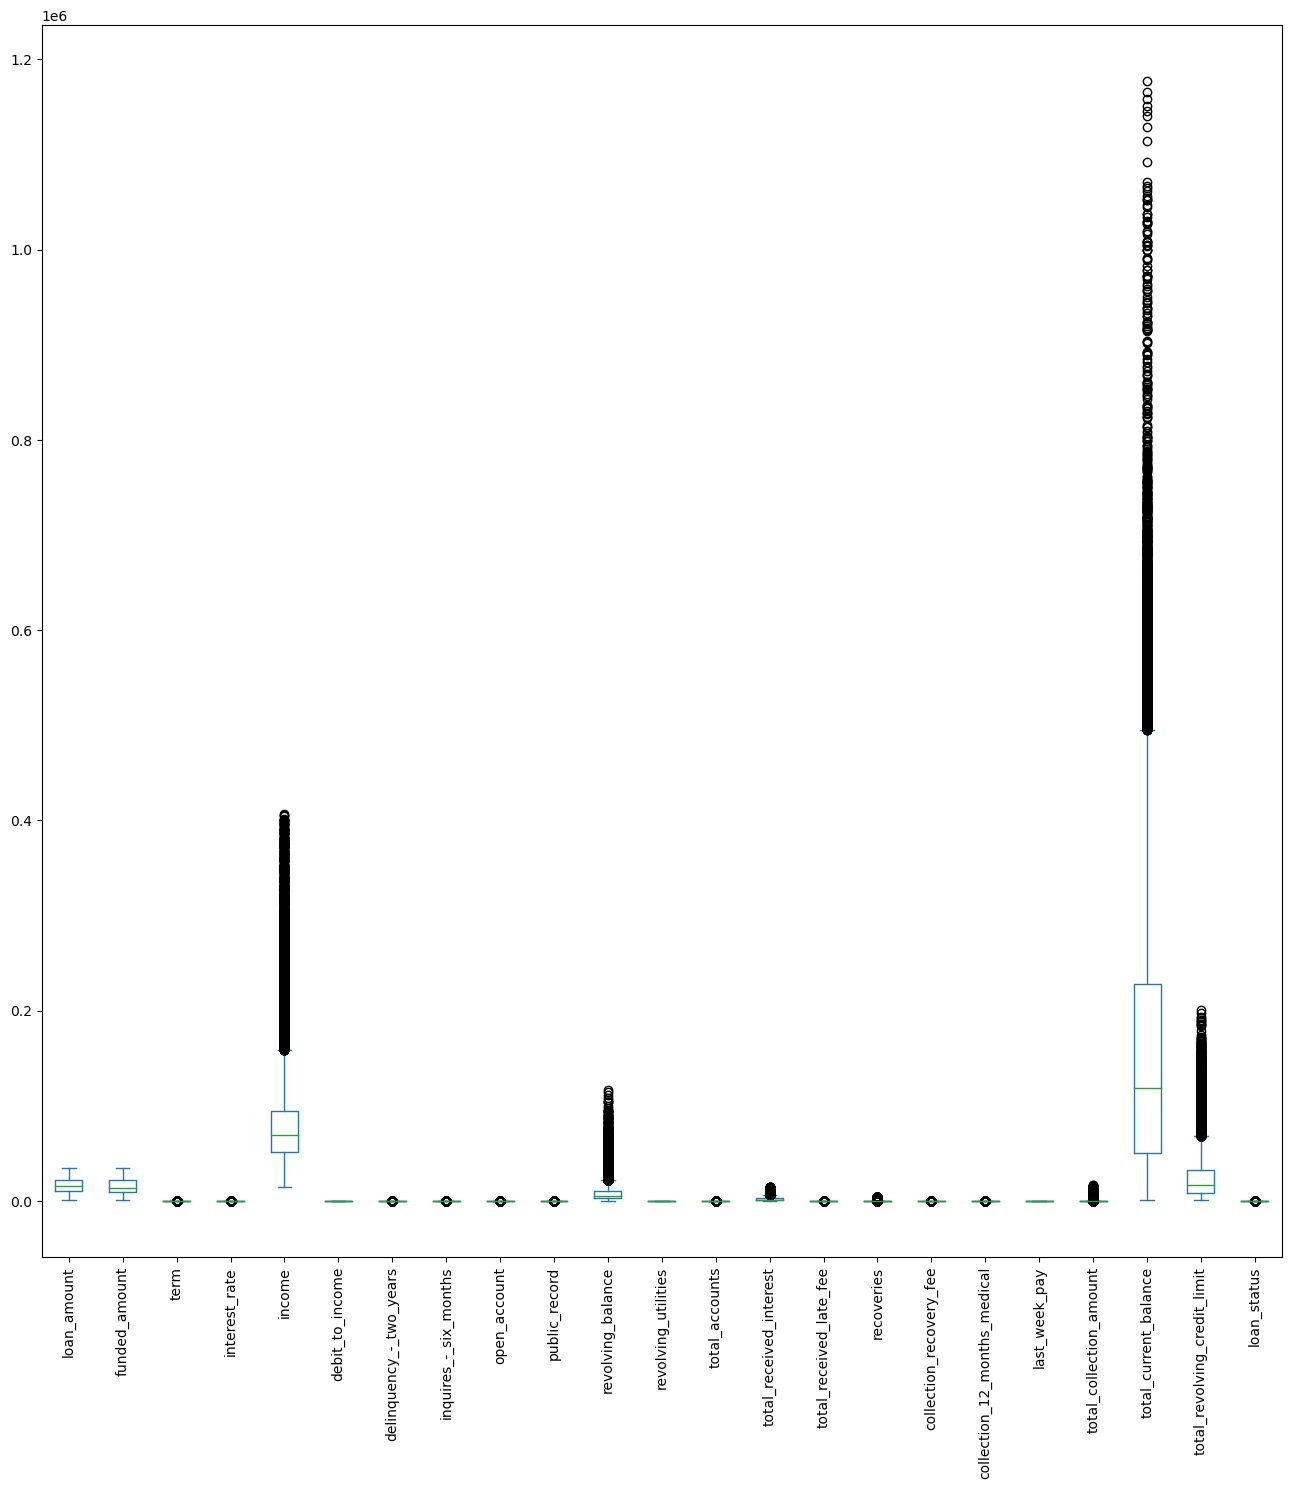

In [39]:
#plt.figure(figsize=(16,16),)
loan_df.plot(kind="box",figsize=(16,16))
plt.xticks(rotation =90)
plt.show()

In [40]:
outliers_frequency= {}

features = ["income" , "revolving_balance" ,"total_revolving_credit_limit","total_current_balance"]
for feature in features:
    Q1 = loan_df[feature].quantile(0.25)
    Q3 = loan_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outlier = loan_df[(loan_df[feature]<lower_limit) | (loan_df[feature]>upper_limit)]
    outliers_frequency[feature] = outlier.shape[0]

outliers_frequency

{'income': 4115,
 'revolving_balance': 3719,
 'total_revolving_credit_limit': 2689,
 'total_current_balance': 1971}

**Self Note**:

* **outlier handling techniques like dropping, capping and binning can be done now, but outllier handling techniques like
Transformations and scaling should be done after encoding ,following by train test split to ensure that the model is trained and evaluated on consistent data distributions.**

* **I initially applied a QuantileTransformer followed by a RobustScaler to handle outliers in the dataset. However, this approach resulted in a 1% decrease in model performance metrics (precision, recall, and overall accuracy) even after hyperparameter tuning.**

* **Although the difference is not significant, I decided to stick with the StandardScaler without additional outlier handling, as it is simpler and more efficient.**

### **9) Separating the Target and Independent Features**

In [41]:
X = loan_df.drop(columns = "loan_status")
y = loan_df["loan_status"]

In [42]:
X.columns

Index(['loan_amount', 'funded_amount', 'term', 'interest_rate', 'grade',
       'home_ownership', 'income', 'verification_status', 'loan_title',
       'debit_to_income', 'delinquency_-_two_years', 'inquires_-_six_months',
       'open_account', 'public_record', 'revolving_balance',
       'revolving_utilities', 'total_accounts', 'initial_list_status',
       'total_received_interest', 'total_received_late_fee', 'recoveries',
       'collection_recovery_fee', 'collection_12_months_medical',
       'application_type', 'last_week_pay', 'total_collection_amount',
       'total_current_balance', 'total_revolving_credit_limit'],
      dtype='object')

### **10) Encoding Categorical Data**

**There was only one feature that have an ordinal data which is grade but i dont know the rank or order so i am just using one hot encoding to all the categorical features to avoid false assumptions**

In [43]:
X = pd.get_dummies(X,drop_first =True)

In [44]:
X.sample(3)

,loan_amount,funded_amount,term,interest_rate,income,debit_to_income,delinquency_-_two_years,inquires_-_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,total_collection_amount,total_current_balance,total_revolving_credit_limit,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,loan_title_Bill Consolidation,loan_title_Bill Payoff,loan_title_Business,loan_title_CC,loan_title_CC Consolidation,loan_title_CC Loan,loan_title_CC Refi,loan_title_CC Refinance,loan_title_CC consolidation,loan_title_CC-Refinance,loan_title_CONSOLIDATE,loan_title_CONSOLIDATION,loan_title_Car Loan,loan_title_Car financing,loan_title_Card Consolidation,loan_title_Cards,loan_title_Consolidate,loan_title_Consolidated,loan_title_Consolidation,loan_title_Consolidation Loan,loan_title_Credit,loan_title_Credit Card,loan_title_Credit Card Consolidation,loan_title_Credit Card Debt,loan_title_Credit Card Loan,loan_title_Credit Card Paydown,loan_title_Credit Card Payoff,loan_title_Credit Card Refi,loan_title_Credit Card Refinance,loan_title_Credit Card Refinance Loan,loan_title_Credit Card consolidation,loan_title_Credit Cards,loan_title_Credit Consolidation,loan_title_Credit Loan,loan_title_Credit card pay off,loan_title_Credit card payoff,loan_title_Credit card refinance,loan_title_Credit card refinancing,loan_title_Credit payoff,loan_title_DEBT CONSOLIDATION,loan_title_Debt,loan_title_Debt Consolidation,loan_title_Debt Consolidation 2013,loan_title_Debt Consolidation Loan,loan_title_Debt Free,loan_title_Debt Loan,loan_title_Debt Payoff,loan_title_Debt Reduction,loan_title_Debt consolidation,loan_title_Debt payoff,loan_title_Dept consolidation,loan_title_Freedom,loan_title_Get Debt Free,loan_title_Getting Ahead,loan_title_Green loan,loan_title_Home,loan_title_Home Improvement,loan_title_Home Improvement Loan,loan_title_Home buying,loan_title_Home improvement,loan_title_Home loan,loan_title_House,loan_title_Lending Club,loan_title_Lending loan,loan_title_Loan,loan_title_Loan 1,loan_title_Loan Consolidation,loan_title_MYLOAN,loan_title_Major purchase,loan_title_Medical,loan_title_Medical expenses,loan_title_Medical loan,loan_title_Moving and relocation,loan_title_My Loan,loan_title_Other,loan_title_Pay Off,loan_title_Payoff,loan_title_Personal,loan_title_Personal Loan,loan_title_Personal loan,loan_title_Pool,loan_title_Refinance,loan_title_Refinance Loan,loan_title_Vacation,loan_title_Wedding Loan,loan_title_bills,loan_title_cards,loan_title_conso,loan_title_consolidate,loan_title_consolidation,loan_title_consolidation loan,loan_title_credit card,loan_title_credit card consolidation,loan_title_credit card refinance,loan_title_credit pay off,loan_title_debt,loan_title_debt consolidation,loan_title_debt consolidation loan,loan_title_debt loan,loan_title_get out of debt,loan_title_home improvement,loan_title_loan1,loan_title_pay off bills,loan_title_payoff,loan_title_personal,loan_title_refi,loan_title_relief,loan_title_vacation,initial_list_status_w,application_type_JOINT
34180,4708,21288,59,15.227043,74572.32334,8.542788,0,0,9,0,26723,30.841503,41,4075.037902,0.011009,3.907155,0.070798,0,59,11,83427,9086,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59743,32278,8271,59,8.964640,85999.58882,24.137342,0,0,11,0,4049,93.766744,12,119.209295,0.022608,3.095386,1.130144,0,71,41,48354,10497,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### **11) Handling Imbalanced Data with Oversampling or Undersampling Approaches**

**i am going to use oversampling ,as i dont want to lose information doing under sampling ,but anyway i should be ready to handle the overfitting from oversampling.**

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 3)
X_resample ,y_resample = smote.fit_resample(X,y)

<Axes: xlabel='loan_status', ylabel='count'>

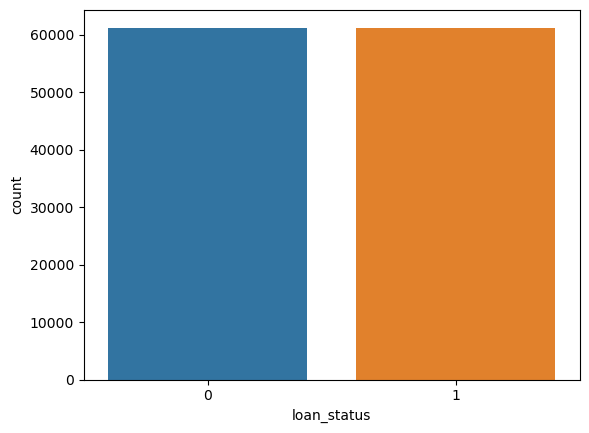

In [46]:
sns.countplot( x = y_resample ) 

In [47]:
y_resample.value_counts()

0    61222
1    61222
Name: loan_status, dtype: int64

**now the target class is balanced**

### **12) Splitting the Data into Training, Validation, and Testing Sets and scaling it.**  

In [48]:
from sklearn.model_selection import train_test_split

X_train ,X_temp ,y_train ,y_temp = train_test_split(X_resample, y_resample, test_size = 0.30 ,random_state= 3)
X_val,X_test,y_val,y_test   = train_test_split(X_temp,y_temp,test_size =0.50 ,random_state=3)

In [49]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(85710, 142) (85710,)
(18367, 142) (18367,)
(18367, 142) (18367,)


### **scaling (balanced data):**

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### **13) Feature Selection Using SelectFromModel and Random Forest Importances**

#### **i am going to use random forest based feature selection**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [52]:
rfc_model = RandomForestClassifier(random_state= 3 )
rfc_model.fit(X_resample ,y_resample)

RandomForestClassifier(random_state=3)

In [53]:
feature_selector = SelectFromModel(rfc_model)

In [54]:
len(X_train.columns)

142

In [55]:
features_selected = X_resample.columns[feature_selector.get_support()]
print(features_selected)
print(len(features_selected))

Index(['loan_amount', 'funded_amount', 'term', 'interest_rate', 'income',
       'debit_to_income', 'delinquency_-_two_years', 'open_account',
       'revolving_balance', 'revolving_utilities', 'total_accounts',
       'total_received_interest', 'total_received_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_week_pay', 'total_collection_amount',
       'total_current_balance', 'total_revolving_credit_limit', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'loan_title_Credit card refinancing',
       'loan_title_Debt Consolidation', 'loan_title_Debt consolidation',
       'loan_title_Home improvement', 'loan_title_Other',
       'initial_list_status_w'],
      dtype='object')
34


#### **now the column got reduced to 33 from 142 .**

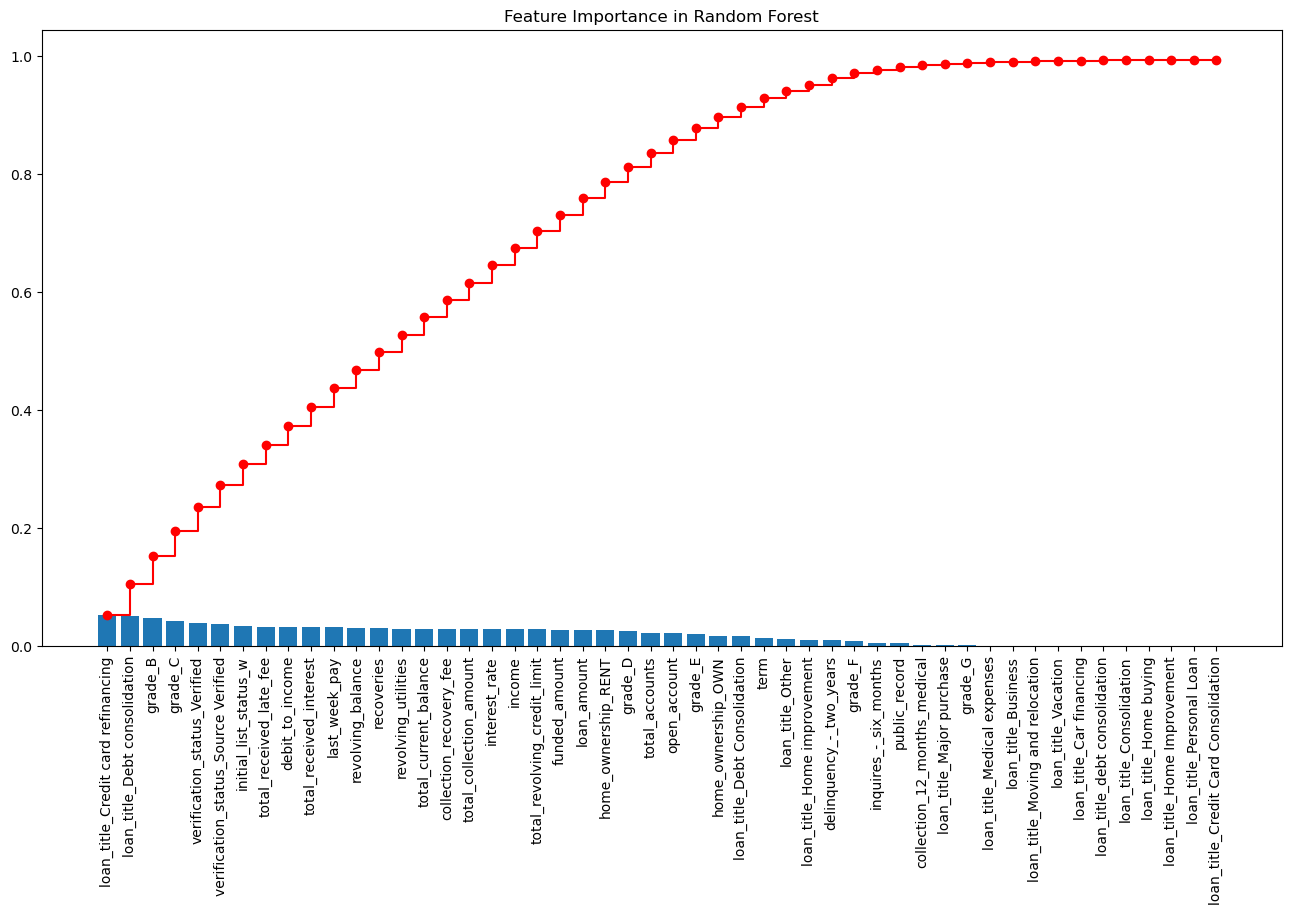

In [56]:
importances = rfc_model.feature_importances_
feature_names = X.columns
top_n_features= 50
sorted_indices = np.argsort(importances)[::-1][:top_n_features]
cumulative_importance = np.cumsum(importances[sorted_indices])
plt.figure(figsize=(16,8))
plt.bar(range(top_n_features), importances[sorted_indices], align='center')
plt.step(range(top_n_features), cumulative_importance, where='post', color='r', marker='o', label='Cumulative Importance')
plt.xticks(range(top_n_features), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importance in Random Forest')
plt.show()


**1) from above we can see top 38 features collectively contribute more than 99% of info to model so lets select top 38 features.**

**2) lets have those top 38 feature's indices alone so that we can use that later on numpy arrays(X_train_scaled and X_val_scaled) while tuning and final model testing**

In [57]:
sorted_indices = np.argsort(importances)[::-1][:38]

## **(D) Model Building and evaluation:**

### **14) Building a Base Model Using the Original Imbalanced Data**

### **Train and test (Imbalanced data)**

In [58]:
X_train_base,X_test_base,y_train_base,y_test_base = train_test_split(X,y,test_size =0.30 ,random_state=3)

In [59]:
print(X_train_base.shape,y_train_base.shape)
print(X_test_base.shape,y_test_base.shape)

(47224, 142) (47224,)
(20239, 142) (20239,)


### **scaling (imbalanced data):**

In [60]:
scaler = StandardScaler()

X_train_base_scaled = scaler.fit_transform(X_train_base)
X_test_base_scaled = scaler.transform(X_test_base)

### **Logistic Regression(base model on imbalanced data):**

In [61]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=3)
log_reg_model.fit(X_train_base_scaled,y_train_base)

LogisticRegression(random_state=3)

In [62]:
y_predict_base = log_reg_model.predict(X_test_base_scaled)
log_reg_model.score(X_test_base_scaled,y_test_base)

0.9075053115272493

In [63]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 

In [64]:
print(confusion_matrix(y_test_base,y_predict_base))

[[18366     2]
 [ 1870     1]]


In [65]:
print(classification_report(y_test_base,y_predict_base))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18368
           1       0.33      0.00      0.00      1871

    accuracy                           0.91     20239
   macro avg       0.62      0.50      0.48     20239
weighted avg       0.85      0.91      0.86     20239



* we can clearly see from the **confusion matrix** our base model built on the **imbalanced data** have predicted **only 1 defaulter correctly** 
* which is stated again by the **recall for 1 (defaulter) is 0 (0%)** 
* but **precision for 0 (non_defaulter) is 0.91(91%)**

### **15) Trying Multiple Models and Tuning Their Hyperparameters with Appropriate Methods, and Reporting the Best Performing Model (Using Balanced Data)**

#### **Trying multiple models on balanced data**

### **Logistic Regression:**

In [66]:
log_reg_model = LogisticRegression(random_state=3)
log_reg_model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=3)

In [67]:
y_predict_log= log_reg_model.predict(X_val_scaled)
log_reg_model.score(X_val_scaled,y_val) 

0.8742309576958676

In [68]:
print(confusion_matrix(y_val,y_predict_log))

[[8441  706]
 [1604 7616]]


In [69]:
print(classification_report(y_val,y_predict_log))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      9147
           1       0.92      0.83      0.87      9220

    accuracy                           0.87     18367
   macro avg       0.88      0.87      0.87     18367
weighted avg       0.88      0.87      0.87     18367



### **Decsion Tree**

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=3)
dt_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=3)

In [71]:
y_predict_dt = dt_model.predict(X_val_scaled)
dt_model.score(X_val_scaled,y_val) 

0.844340393096314

In [72]:
print(confusion_matrix(y_val,y_predict_dt))

[[7525 1622]
 [1237 7983]]


In [73]:
print(classification_report(y_val,y_predict_dt))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      9147
           1       0.83      0.87      0.85      9220

    accuracy                           0.84     18367
   macro avg       0.84      0.84      0.84     18367
weighted avg       0.84      0.84      0.84     18367



### **Random Forest:**

In [74]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=3)
rfc_model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=3)

In [75]:
y_predict_rfc = rfc_model.predict(X_val_scaled)
rfc_model.score(X_val_scaled,y_val) 

0.9172428812544237

In [76]:
print(confusion_matrix(y_val,y_predict_rfc))

[[8839  308]
 [1212 8008]]


In [77]:
print(classification_report(y_val,y_predict_rfc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      9147
           1       0.96      0.87      0.91      9220

    accuracy                           0.92     18367
   macro avg       0.92      0.92      0.92     18367
weighted avg       0.92      0.92      0.92     18367



### **Gradient Boosting**

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl_model = GradientBoostingClassifier(random_state=3)
gbcl_model.fit(X_train_scaled,y_train)

GradientBoostingClassifier(random_state=3)

In [79]:
y_predict_gbcl = gbcl_model.predict(X_val_scaled)
gbcl_model.score(X_val_scaled,y_val) 

0.8716175749986389

In [80]:
print(confusion_matrix(y_val,y_predict_gbcl))

[[8229  918]
 [1440 7780]]


In [81]:
print(classification_report(y_val,y_predict_gbcl))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      9147
           1       0.89      0.84      0.87      9220

    accuracy                           0.87     18367
   macro avg       0.87      0.87      0.87     18367
weighted avg       0.87      0.87      0.87     18367



### **XGBOOST**

In [82]:
from xgboost import XGBClassifier

xgbcl_model = XGBClassifier()
xgbcl_model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
y_predict_xgbcl = xgbcl_model.predict(X_val_scaled)
xgbcl_model.score(X_val_scaled,y_val) 

0.8951924647465563

In [84]:
print(confusion_matrix(y_val,y_predict_xgbcl))

[[8472  675]
 [1250 7970]]


In [85]:
print(classification_report(y_val,y_predict_xgbcl))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9147
           1       0.92      0.86      0.89      9220

    accuracy                           0.90     18367
   macro avg       0.90      0.90      0.90     18367
weighted avg       0.90      0.90      0.90     18367



### **16) Hyperparameter Tuning**

### **Hyperparameter Tuning for RandomForest classifier**

#### **For hyperparameter tuning i am going to use randomisedsearchcv**

In [86]:
rfc_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

In [87]:
from sklearn.model_selection import RandomizedSearchCV

rfc_param_grid = {
    "n_estimators" : [100,200,500],
    "max_depth" : [10,20,30],
    "min_samples_split" :[2,4,6],
    "min_samples_leaf" : [1,2,4]
    #"max_features" : ["sqrt"],
    #"bootstrap" : [True],
}

rfc_search = RandomizedSearchCV(estimator = rfc_model, param_distributions = rfc_param_grid, n_iter=100,
                                n_jobs =-1,scoring='accuracy', cv=3,random_state=3)

In [88]:
print(X_train_scaled.shape)
print(y_train.shape)

(85710, 142)
(85710,)


In [89]:
print(X_train_scaled[:,sorted_indices].shape)

(85710, 38)


In [90]:
rfc_search.fit(X_train_scaled[:,sorted_indices],y_train) 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=3),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 500]},
                   random_state=3, scoring='accuracy')

In [91]:
rfc_best_params = rfc_search.best_params_
rfc_best_score = rfc_search.best_score_

print(f"best parameters for random forest classifier: {rfc_best_params}")
print(f"best score for random forest classifier: {rfc_best_score}")

best parameters for random forest classifier: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
best score for random forest classifier: 0.9029634815074087


### **Hyperparameter Tuning for XGBoost classifier**

In [92]:
xgbcl_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [93]:
xgbcl_param_grid = {
    'n_estimators': [100, 200, 500,1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 1],
    'gamma': [0, 0.1, 0.2] 
}

xgbcl_search = RandomizedSearchCV(estimator = xgbcl_model, param_distributions = xgbcl_param_grid, n_iter=100 ,
                                 n_jobs =-1,scoring='accuracy', cv=3,random_state=3)


xgbcl_search.fit(X_train_scaled[:,sorted_indices],y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'subsample': [0.5, 0.7, 0.9]},
                   random_state=3, scoring='accuracy')

In [94]:
xgbcl_best_params = xgbcl_search.best_params_
xgbcl_best_score = xgbcl_search.best_score_

print(f"best parameters for xgboost classifier: {xgbcl_best_params}")
print(f"best score for xgboost classifier: {xgbcl_best_score}")

best parameters for xgboost classifier: {'subsample': 0.5, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1}
best score for xgboost classifier: 0.9165208260413021


## **(E) Pipeline:**

### **17) Building a Pipeline to Incorporate All Possible Steps, Fitting the Pipeline on Train Data, and Obtaining Predictions on Validation and Test Data**

### **a) Hyperparameter tuned RandomForestClassifier:**

In [95]:
from sklearn.pipeline import make_pipeline

rfc_pipe = make_pipeline(StandardScaler(),
                         RandomForestClassifier(**rfc_best_params)
                     )

In [96]:
rfc_pipe.fit(X_train.iloc[ : , sorted_indices],y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=30, n_estimators=500))])

#### **Testing on validation data:**

In [97]:
fitted_features = X_train.iloc[ : , sorted_indices].columns
y_predict_rfc_pipe = rfc_pipe.predict(X_val[fitted_features])

In [98]:
confusion_matrix(y_val, y_predict_rfc_pipe)

array([[8760,  387],
       [1225, 7995]], dtype=int64)

In [99]:
print(classification_report(y_val,y_predict_rfc_pipe))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      9147
           1       0.95      0.87      0.91      9220

    accuracy                           0.91     18367
   macro avg       0.92      0.91      0.91     18367
weighted avg       0.92      0.91      0.91     18367



#### **Testing on testing data:**

In [100]:
y_predict_rfc_pipe = rfc_pipe.predict(X_test[fitted_features])

In [101]:
confusion_matrix(y_test, y_predict_rfc_pipe)

array([[8822,  420],
       [1162, 7963]], dtype=int64)

In [102]:
print(classification_report(y_test,y_predict_rfc_pipe))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      9242
           1       0.95      0.87      0.91      9125

    accuracy                           0.91     18367
   macro avg       0.92      0.91      0.91     18367
weighted avg       0.92      0.91      0.91     18367



### **b) Hyperparameter tuned XGBOOSTclassifier:**

In [103]:
xgbcl_pipe = make_pipeline(StandardScaler(),
                         XGBClassifier(**xgbcl_best_params)
                        )

In [104]:
xgbcl_pipe.fit(X_train[fitted_features],y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

#### **Testing on validation data:**

In [105]:
y_predict_xgbcl_pipe = xgbcl_pipe.predict(X_val[fitted_features])
xgbcl_pipe.score(X_val[fitted_features],y_val)

0.9271519573147493

In [106]:
confusion_matrix(y_val, y_predict_xgbcl_pipe)

array([[8692,  455],
       [ 883, 8337]], dtype=int64)

In [107]:
print(classification_report(y_val,y_predict_xgbcl_pipe))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9147
           1       0.95      0.90      0.93      9220

    accuracy                           0.93     18367
   macro avg       0.93      0.93      0.93     18367
weighted avg       0.93      0.93      0.93     18367



#### **Testing on testing data:**

In [108]:
y_predict_xgbcl_pipe = xgbcl_pipe.predict(X_test[fitted_features])
xgbcl_pipe.score(X_test[fitted_features],y_test)

0.9295475581205422

In [109]:
confusion_matrix(y_test, y_predict_xgbcl_pipe)

array([[8802,  440],
       [ 854, 8271]], dtype=int64)

In [110]:
print(classification_report(y_test,y_predict_xgbcl_pipe))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9242
           1       0.95      0.91      0.93      9125

    accuracy                           0.93     18367
   macro avg       0.93      0.93      0.93     18367
weighted avg       0.93      0.93      0.93     18367



## **(F) Conclusion:**

### **18) Comparing the Evaluation Metrics of the Base Model and the Tuned Model, and Insights from the EDA**

#### **Basemodel(Logistic Regression) with imbalanced data:**

* *accuracy:*  
               91% approxmimately.
* *precision:* 
               non_defaulter (0): 91%.
               defaulter (1) : 33%.
* *recall:* 
               non_defaulter (0): 100%.
               defaulter (1) : 0%.

#### **Hyperparameter tuned XGBOOSTClassifier model with balanced data:**

* #### **results when i run the code in my local computer**
    * *accuracy:* 
                93% approximately.
    * *precision:* 
                non defaulter (0): 91%.
                defaulter (1) : 95%.
    * *recall:* 
                non defaulter (0): 95%.
                defaulter (1) : 91%.

* #### **results when i run the code in Kaggle**
    * *accuracy:* 
                94% approximately.
    * *precision:* 
                non defaulter (0): 90%.
                defaulter (1) : 99%.
    * *recall:* 
                non defaulter (0): 99%.
                defaulter (1) : 89%.


        

* From this, we can clearly see that after applying **hyperparameter tuning** on the **XGBoost Classifier** using **RandomizedSearchCV** on the **balanced dataset**, we were able to **increase** the accuracy, precision, and **recall** especially in **identifying defaulters**. 
* The recall for defaulters improved dramatically, **rising from 0% to 91%**.

### **Suggestion**

**You can also try using the ROC-AUC and Precision-Recall curve to evaluate the models visually. While I have evaluated the models using the confusion matrix and classification report (precision, recall, F1-score), these curves provide a visual representation of how the model performs at various thresholds and can give additional insights, especially in these type of imbalanced datasets.**

### **Insights From EDA:**

### **Statistical summary Insights(numerical data):**

#### **i dont know the currency so i am going with usd**

* Maximum loan amount is **USD 35,000**, minimum loan amount is **USD 1,014**, and the average loan amount is **USD 16,848**.
* Maximum funded amount is **USD 34,999**, minimum funded amount is **USD 1,014**, and the average funded amount is **USD 15,770**.
* Average loan term is **58 months**.
* Average interest rate is **11.84%**.
* Average total collection amount is **USD 146**.
* Average total received interest is **USD 2,068**.

### **Statistical summary Insights(categorical data):**

#### **Most frequent categories:**

* Grade assigned by the bank: **C**.
* Home ownership status: **Mortgage**.
* Application type: **Individual**.
* Loan title: **Credit card refinancing**.
* Verification status: **Almost half** of the applications are **source verified**.

### **Insights From Univariate Analysis (numerical continous data):**

#### **Key insights from the data distribution:**

* Loan amounts are most frequently between **USD 10,000 and 20,000**, with a spike around **USD 15,000**.
* Funded amounts tend to be around **USD 10,000**.
* Interest rates are typically between **10% and 12%**.
* Incomes are generally less than USD **100,000**.
* Debt-to-income ratios hover around **20%.**
* Open accounts are usually between **10 and 15.**
* Revolving balances are below USD **25,000.**
* Revolving utilities fall between **25% and 75%.**
* Total accounts are usually **around 20.**
* Total received interest is typically less than **USD 5,000.**

### **Insights From Univariate Analysis (numerical discrete data):**

* **93%** of applicants have **0 public records**.
* **97%** of applicants have a total collection amount (**including medical**).
* **89%** of applicants have **0 inquiries** in the last six months.
* **77%** of applicants have **0 delinquencies** in the past two years.
* **97%** of applicants have a loan term of either **58 or 59 months**.

### **Insights From Univariate Analysis (categorical data):**

#### **Top categories and distributions:**

* The **top 3 grades, C, B, and A**, account for more than **70% of all loans**.
* **88% of applicants** have a home in either rental or mortgage form, leaving less than 12% with their own home.
* More than **75% of applicants** are either verified or source verified, with the remaining 25% being not verified.
* **Almost all** applicants are of **individual** loan application type. **Less than 0.5% have a joint application type.**
* Approximately **46%** of the loans have an initial listing status of **waitlisted**, while the remaining **53% are forwarded.**
* The **top 10 loan types** contribute to more than **96%** of loans. Out of these, **credit card refinancing and debt consolidation** alone make up more than **86%**.

### **Insights From Target Class(loan_status):**
* The target class is very imbalanced as the non defaulter accounts for more than 90 %. so the model predicts non defaulter better than defaulter, so we need to use sampling techniques to make it balanced**

## * **🔗 Visit the [Streamlit app](https://bank-loan-defaulter-prediction-arun.streamlit.app/) to interact with the model in real-time!**

## * **💻 Find the full project repository on [GitHub](https://github.com/arunkumarsp-ds/Bank-Loan-Defaulter-Prediction/tree/main)!**

### **Code snippets for building the streamlit app**
**This section includes essential code snippets to save the trained model and selected features, which will be utilized later in the Streamlit app.**

In [111]:
import joblib
joblib.dump(fitted_features.tolist(),"encoded_features.pkl")

['encoded_features.pkl']

In [112]:
joblib.dump(xgbcl_pipe,"model.pkl")

['model.pkl']

In [113]:
loan_df.to_csv("updated_loan_data.csv",index =False)

In [114]:
y_predict_xgbcl_pipe[:5]

array([0, 0, 1, 0, 0])

In [115]:
X_test[fitted_features].head()

,loan_title_Credit card refinancing,loan_title_Debt consolidation,grade_B,grade_C,verification_status_Verified,verification_status_Source Verified,initial_list_status_w,total_received_late_fee,debit_to_income,total_received_interest,last_week_pay,revolving_balance,recoveries,revolving_utilities,total_current_balance,collection_recovery_fee,total_collection_amount,interest_rate,income,total_revolving_credit_limit,funded_amount,loan_amount,home_ownership_RENT,grade_D,total_accounts,open_account,grade_E,home_ownership_OWN,loan_title_Debt Consolidation,term,loan_title_Other,loan_title_Home improvement,delinquency_-_two_years,grade_F,inquires_-_six_months,public_record,collection_12_months_medical,loan_title_Major purchase
40907,1,0,0,1,0,1,1,0.076941,30.579669,530.549237,64,6075,0.833190,22.199334,65890,0.796307,32,11.793816,60149.669760,30341,24882,13778,0,0,27,9,0,0,0,59,0,0,0,0,0,0,0,0
31939,1,0,0,0,0,1,1,0.111038,36.376390,557.637385,17,2414,0.514468,84.506744,356848,0.005573,47,10.320617,122791.168200,27808,14861,9273,1,0,23,13,0,0,0,59,0,0,0,0,0,0,0,0
117447,1,0,0,0,0,0,1,0.059653,23.104831,1487.381401,25,5140,6.244309,59.841544,118057,1.089063,37,10.573807,29113.050358,1589,9204,9895,1,0,16,9,0,0,0,58,0,0,0,0,0,0,0,0
59265,1,0,0,0,1,0,0,0.017935,21.505544,7160.615291,4,6237,1558.945076,62.171086,69664,0.697245,20,7.639417,66981.168980,56572,29496,9886,0,0,22,16,0,0,0,58,0,0,0,0,0,0,0,0
12761,1,0,0,0,0,1,0,0.023673,25.773514,1592.441045,7,4530,1.589196,43.367719,82947,0.887537,52,19.463323,90121.499220,30289,3011,13028,0,1,19,20,0,0,0,58,0,0,0,0,0,0,0,0


In [116]:
xgbcl_pipe.predict(X_test.loc[117447 ,fitted_features].values.reshape(1,-1))

array([1])

In [117]:
X_test.loc[117447 ,fitted_features]

loan_title_Credit card refinancing          1.000000
loan_title_Debt consolidation               0.000000
grade_B                                     0.000000
grade_C                                     0.000000
verification_status_Verified                0.000000
verification_status_Source Verified         0.000000
initial_list_status_w                       1.000000
total_received_late_fee                     0.059653
debit_to_income                            23.104831
total_received_interest                  1487.381401
last_week_pay                              25.000000
revolving_balance                        5140.000000
recoveries                                  6.244309
revolving_utilities                        59.841544
total_current_balance                  118057.000000
collection_recovery_fee                     1.089063
total_collection_amount                    37.000000
interest_rate                              10.573807
income                                  29113.